<a href="https://colab.research.google.com/github/doryeng/web1/blob/master/StockPredict_Amazon_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 아마존 주가예측


In [ ]:
# 빵형의 개발도상국 코딩을 바탕으로 수정하여 작성함
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from datetime import datetime

start = datetime(1970, 1, 4)
end = datetime(2020, 6, 20)

# Load Dataset

In [ ]:
SE = web.DataReader('AMZN', 'yahoo', start, end)
SE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-05-15,2.500000,1.927083,2.437500,1.958333,72156000.0,1.958333
1997-05-16,1.979167,1.708333,1.968750,1.729167,14700000.0,1.729167
1997-05-19,1.770833,1.625000,1.760417,1.708333,6106800.0,1.708333
1997-05-20,1.750000,1.635417,1.729167,1.635417,5467200.0,1.635417
1997-05-21,1.645833,1.375000,1.635417,1.427083,18853200.0,1.427083


# Compute Mid Price

In [ ]:
high_prices = SE['High'].values
low_prices = SE['Low'].values
mid_prices = (high_prices + low_prices) / 2

# Create Windows

In [ ]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [ ]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((5186, 50, 1), (576, 50, 1))

# Build a Model

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 5186 samples, validate on 576 samples
Epoch 1/20
5186/5186 [==============================] - 26s 5ms/step - loss: 0.0103 - val_loss: 0.0010
Epoch 2/20
5186/5186 [==============================] - 25s 5ms/step - loss: 0.0037 - val_loss: 4.3261e-04
Epoch 3/20
5186/5186 [==============================] - 25s 5ms/step - loss: 0.0028 - val_loss: 4.6684e-04
Epoch 4/20
5186/5186 [==============================] - 25s 5ms/step - loss: 0.0023 - val_loss: 8.7873e-04
Epoch 5/20
5186/5186 [==============================] - 25s 5ms/step - loss: 0.0025 - val_loss: 3.6876e-04
Epoch 6/20
5186/5186 [==============================] - 25s 5ms/step - loss: 0.0022 - val_loss: 4.5648e-04
Epoch 7/20
5186/5186 [==============================] - 25s 5ms/step - loss: 0.0023 - val_loss: 7.0800e-04
Epoch 8/20
5186/5186 [==============================] - 27s 5ms/step - loss: 0.0022 - val_loss: 3.3884e-04
Epoch 9/20
5186/5186 [==============================] - 25s 5ms/step - loss: 0.0021 - val_loss: 4.785

# Prediction

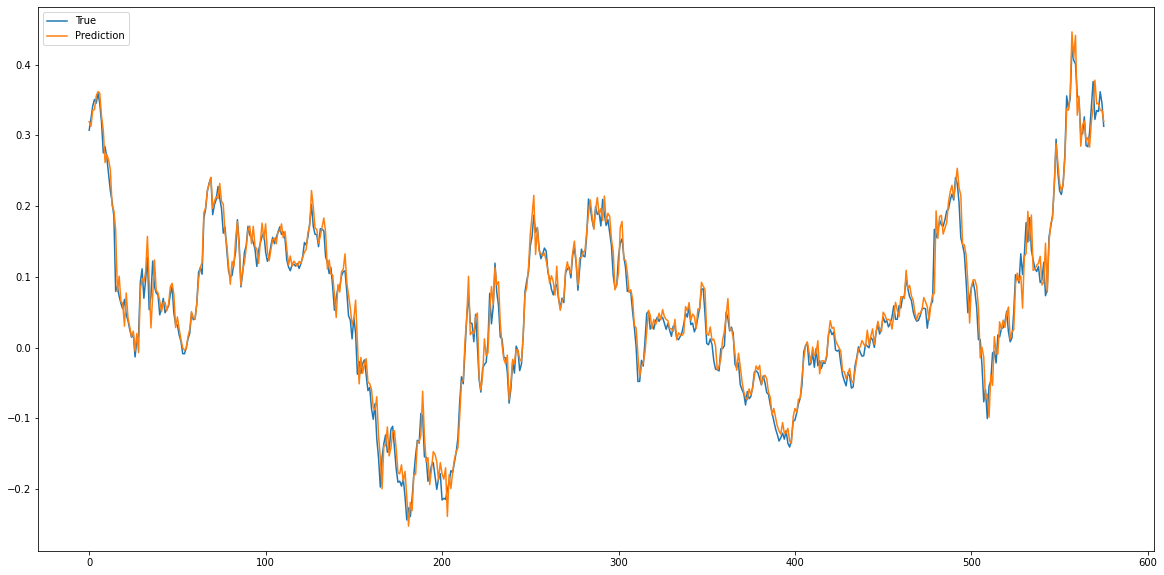

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()